# **Optimizing Airbnb Host Performance in Bangkok**
# **I. Introduction**

This analysis aims to improve the host performance by optimizng this key performance:
1. **Pricing Strategy**

With the increase in competetiveness among host in bangkok finding the sweet spot between profit and competetive becomes crucial

2. **Availability Optimization**

Maxmizing booking potential

3. **Listing performance**

increasing listing performances


## **1.1 Summary**
This project aims to analyze Airbnb listing data to uncover insights that can help optimize pricing strategies, improve host performance, and enhance overall listing quality. By examining various factors such as neighborhood trends, property types, pricing, review scores, and host behavior, the analysis provides actionable recommendations for hosts and stakeholders to maximize occupancy and profitability.

## **1.2 Objectives**
The primary objectives of this project are to:

1. Identify optimal pricing ranges based on neighborhood or property type.

2. Recommend ideal minimum stay requirements to maximize occupancy and revenue.

3. Analyze key factors that contribute to an increase in the number of listings.

4. Provide data-driven recommendations to enhance host performance and guest satisfaction.

## **1.3 Key Questions**
1. How do prices vary across different neighborhoods and room types?

2. What is the relationship between price, availability, and the number of reviews?

3. Which factors are most strongly associated with high review scores?

4. How do hosts managing multiple properties perform compared to those managing a single property?



# **II. Datasets**

## **2.1 Airbnb Listings Bangkok Data Dictionary**
### **1. Listing Identifiers**
- **`id`**: Unique identifier for the listing.  
- **`name`**: Title/name of the listing (e.g., "Cozy Apartment near Khao San Road").  

### **2. Host Information**
- **`host_id`**: Unique identifier for the host.  
- **`host_name`**: First name(s) of the host.  
- **`calculated_host_listings_count`**: Total listings the host owns in Bangkok (from current data scrape).  

### **3. Location Data**
- **`neighborhood`**: Geocoded neighborhood (derived from latitude/longitude using public shapefiles).  
- **`latitude`**: WGS84 projection (standard GPS coordinate system).  
- **`longitude`**: WGS84 projection.  

### **4. Room Details**
- **`room_type`**:  
  - `Entire home/apt`: Private, self-contained unit.  
  - `Private room`: Private bedroom with shared common areas.  
  - `Shared room`: Shared sleeping space (budget-friendly).  
  - `Hotel`: Professionally managed accommodation.  

### **5. Pricing & Availability**
- **`price`**: Daily rate in local currency (may show `$` even for non-USD locales).  
- **`minimum_nights`**: Minimum stay requirement (nights).  
- **`availability_365`**: Days available in the next year (0–365; accounts for bookings/host blocks).  

### **6. Review Metrics**
- **`number_of_reviews`**: Total reviews ever received.  
- **`number_of_reviews_ltm`**: Reviews in the **last 12 months** (LTM = Last Twelve Months).  
- **`last_review`**: Date of the most recent review (format: `YYYY-MM-DD`).  


## **2.2 Import Datasets**

### **1. Library Setup**

In [1]:
############
### Setup ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from datetime import datetime, timedelta, date


############
############

### **2. Initiate AirBnB Listings 2023 Datasets**


In [2]:
df_firstdata = pd.read_csv('Documents/Amjad/Capstone Module 2/Airbnb Listings Bangkok.csv')

## **2.3 Data Cleaning**

### **1. Briefsets Data Summary**

In [3]:
df_firstdata.head(10)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0
5,5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
8,8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
9,9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0


In [4]:
df_firstdata.tail(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


### **2. Checking For Duplicates**

In [5]:
df_firstdata.duplicated().sum()


0

### **Result**
##### Found no duplucates proceed without removing any.

### **3. Data Summary**

In [6]:
df_firstdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [7]:
df_firstdata.shape

(15854, 17)

In [8]:
df_firstdata.describe(include='all')

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,15846,1.585400e+04,15853,15854,15854.000000,15854.000000,15854,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
unique,NaN,NaN,14794,NaN,5312,50,NaN,NaN,4,NaN,NaN,NaN,1669,NaN,NaN,NaN,NaN
top,NaN,NaN,New! La Chada Night Market studio 2PPL near MRT,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-12-11,NaN,NaN,NaN,NaN
freq,NaN,NaN,45,NaN,228,2153,NaN,NaN,8912,NaN,NaN,NaN,189,NaN,NaN,NaN,NaN
mean,7926.500000,1.579397e+17,NaN,1.541058e+08,NaN,NaN,13.745144,100.559903,NaN,3.217704e+03,15.292355,16.654157,NaN,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,NaN,1.318726e+08,NaN,NaN,0.043040,0.050911,NaN,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,NaN,5.892000e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,NaN,3.974431e+07,NaN,NaN,13.720090,100.529690,NaN,9.000000e+02,1.000000,0.000000,NaN,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,NaN,1.224556e+08,NaN,NaN,13.738490,100.561415,NaN,1.429000e+03,1.000000,2.000000,NaN,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,NaN,2.390547e+08,NaN,NaN,13.759497,100.585150,NaN,2.429000e+03,7.000000,13.000000,NaN,1.060000,13.000000,360.000000,3.000000


### **4. Checking for NULL**

In [9]:
df_firstdata.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

##### **Checking NULL Count**

######################
Missing review data:
                   Missing Count  Missing Percentage
last_review                 5790               36.52
reviews_per_month           5790               36.52


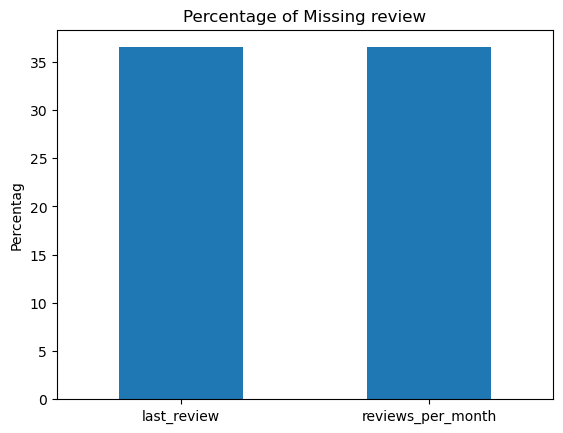

######################


In [10]:
#Checking how much is missing from the data
missing_review = pd.DataFrame({
    'Missing Count': df_firstdata[['last_review', 'reviews_per_month']].isnull().sum(),
    'Missing Percentage': (df_firstdata[['last_review', 'reviews_per_month']].isnull().mean() * 100).round(2)
})

print('######################')
print("Missing review data:")
print(missing_review)
#Visual
missing_review['Missing Percentage'].plot(kind='bar', 
                                       title='Percentage of Missing review',
                                       ylabel='Percentag')
plt.xticks(rotation=0)#it shows fro y axis so changed it into 0
plt.show()

print('######################')

### **5. Checking for Unique Strings**

- #### **Roomtype**

In [11]:
room_type_counts = df_firstdata['room_type'].value_counts() #checking for unique string 
print(room_type_counts)

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64


- #### **Neighbourhood**

In [12]:
neighbourhood_counts = df_firstdata['neighbourhood'].value_counts() #checking for unique string 
print(neighbourhood_counts)

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


In [13]:
host_name_counts = df_firstdata['host_name'].value_counts() #checking for unique string 
print(host_name_counts)

host_name
Curry        228
Noons         99
K             91
Pornchai      63
Bee           62
            ... 
Dawa           1
Ratjaporn      1
Nupla          1
Ziao           1
Renee          1
Name: count, Length: 5312, dtype: int64


### **6. Issue Identified**
1. **`name`**
had some unrecognize language being used such as : ***à¸§à¸ªà¸§à¸±à¸•à¸•à¸´à¹***
2. **`name`** & **`host_name`** had some missing value
3. **`unnamed`** unuse column probably index
4. **`last_review`** & **`review_per_month`**
missing value
5. **`last_review`**
Dtype is **object** instead of **datetime64**
6. **`price`**
some absurd amount of pricing

## **2.4 Data Cleaning**

### 1.**`host_name`** & **`name`** had some missing string so it will be replace with unknow since it is a qualitative data

In [14]:
missing_name_row = df_firstdata[df_firstdata['name'].isnull()] #checking if the row is wrong
missing_name_row

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [15]:
missing_host_row = df_firstdata[df_firstdata['host_name'].isnull()] #checking if the row is wrong
missing_host_row

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [16]:
df_firstdata['host_name'] = df_firstdata['host_name'].fillna("Unknown")
df_firstdata['name'] = df_firstdata['name'].fillna("Unknown")

### 2. **`name` Data Cleaning**
after analysing the data, it was discovered that the unrecognize language is actually an unencoded thai.
I've decided to decode the `name` for clarity

In [17]:
before_name = df_firstdata.loc[df_firstdata['id'] == 973830]
before_name

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
29,29,973830,BangLuang House1 @ Bangkok Thailand,5325919,วสวัตติ์,Bangkok Yai,13.73292,100.46413,Private room,2078,1,76,2019-12-31,0.64,3,350,0


In [18]:
def decode_thai(text):
    if pd.isna(text):
        return text
    try:
        return text.encode('latin-1').decode('tis-620')  # thais encode
    except:
        return text  # if fail return original, cuz there is also chineese and had now issue with it since it is just name, weirdly enough it also encode emoji

df_firstdata['name_clean'] = df_firstdata['name'].apply(decode_thai)
df_firstdata['host_name_clean'] = df_firstdata['host_name'].apply(decode_thai)

In [19]:

after_name = df_firstdata.loc[df_firstdata['id'] == 973830]
after_name

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_clean,host_name_clean
29,29,973830,BangLuang House1 @ Bangkok Thailand,5325919,วสวัตติ์,Bangkok Yai,13.73292,100.46413,Private room,2078,1,76,2019-12-31,0.64,3,350,0,BangLuang House1 @ Bangkok Thailand,วสวัตติ์


### 3. removing `unnamed` column

In [20]:
df_firstdata.drop(columns=['Unnamed: 0'], inplace=True)

### 4 **`last_review`** & **`review_per_month`** the data is actually valid, since if there are no guest = no review thus the listing data will be considered as a unbooked listing. with such:

- **`last_review`** would be changed into NaT to fill it in and changed the dtype into datetime64

- **`review_per_month`** would be changed into 0 if empty

In [21]:
#change to datetime 64
df_firstdata['last_review'] = pd.to_datetime(df_firstdata['last_review'])

#check changess
print(df_firstdata['last_review'].dtype)  # Should now show 'datetime64[ns]'

datetime64[ns]


In [22]:
# making sure its datetime yyyy-mm-dd
df_firstdata['last_review'] = pd.to_datetime(df_firstdata['last_review'])

# changing the value into 0
df_firstdata['reviews_per_month'] = df_firstdata['reviews_per_month'].fillna(0)


In [23]:
df_firstdata['host_name'] = df_firstdata['host_name'].fillna("Unknown")

- ### **checking if there are still null**

In [24]:
df_firstdata.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
name_clean                           0
host_name_clean                      0
dtype: int64

### **`last_review`** has 5790 null because it is set into  rather than leaving it empty

### 5. **`price`** has an outlier

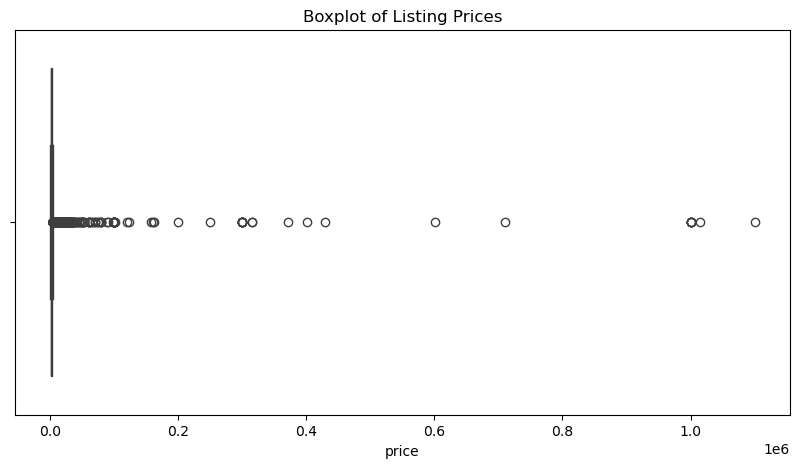

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_firstdata['price'])
plt.title("Boxplot of Listing Prices")
plt.show()

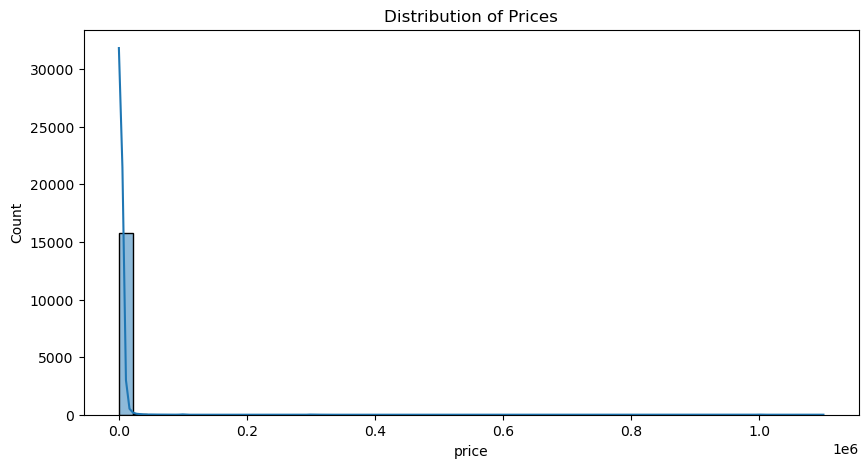

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df_firstdata['price'], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.show()

The data is heavly skewed to the right

In [27]:
Q1 = df_firstdata['price'].quantile(0.25)#testing IQR
Q3 = df_firstdata['price'].quantile(0.75)
IQR = Q3 - Q1

# lower bound and uper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#summary outliers
outliers_iqr = df_firstdata[(df_firstdata['price'] < lower_bound) | (df_firstdata['price'] > upper_bound)]
print("######################")
print(f"##Number of IQR outliers: {len(outliers_iqr)}")
print(f"##Lower bound: THB{lower_bound:.2f}, Upper bound: THB{upper_bound:.2f}")

######################
##Number of IQR outliers: 1403
##Lower bound: THB-1393.50, Upper bound: THB4722.50


removing the outlier

######################
##Original dataset size: 15854
##Cleaned dataset size: 14451
##Number of outliers removed: 1403


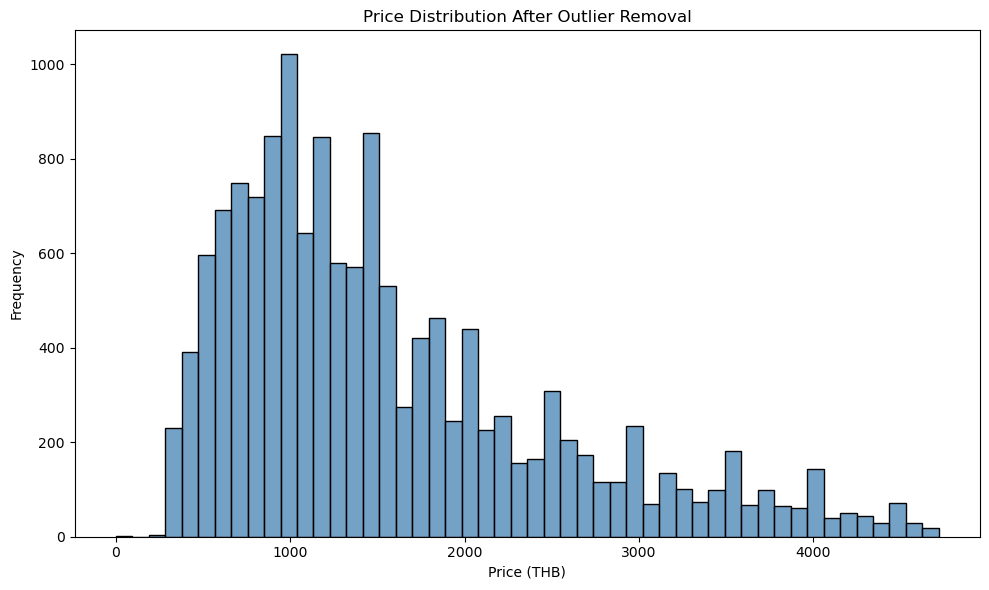

In [28]:
#clean_price as a new dataframe
df_clean_price = df_firstdata[~((df_firstdata['price'] < lower_bound) | (df_firstdata['price'] > upper_bound))]
df_clean_price = df_firstdata[df_firstdata['price'].between(lower_bound, upper_bound)]
print("######################")
print(f"##Original dataset size: {len(df_firstdata)}")
print(f"##Cleaned dataset size: {len(df_clean_price)}")
print(f"##Number of outliers removed: {len(df_firstdata) - len(df_clean_price)}")
# visual
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_price['price'], bins=50, color='steelblue')
plt.title("Price Distribution After Outlier Removal")
plt.xlabel("Price (THB)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### **BUT**
There is a possibility that some of the listings are in luxury area 

In [29]:
# luxury condition seperating the non luxury neighborhoud
luxury_condition = (
    (df_firstdata['price'] > upper_bound) & 
    (df_firstdata['neighbourhood'].isin([
        "Vadhana", "Khlong Toei", "Ratchathewi", "Bang Rak", "Sathon",#data from news outlet
        "Phra Nakhon", "Phra Khanong", "Parthum Wan", "Khlong San",
        "Yan na wa", "Suanluang"
    ]))
)

# Split data
valid_luxury = df_firstdata[luxury_condition]  # Keep these
potential_errors = df_firstdata[~luxury_condition & (
    (df_firstdata['price'] < lower_bound) | 
    (df_firstdata['price'] > upper_bound)
)]  # Outliers to remove

Here are the data used for **`luxury_condition`**
- [https://pierrelisted.com/real-estate-trends/where-are-the-most-expensive-neighborhoods-in-bangkok](URL)
- [https://www.nationthailand.com/business/property/40037393](URL)

In [30]:
# merge valid non outlier data with the luxury_
df_clean_lux = pd.concat([# changed df_clean into df_clean_lux for clarity
    valid_luxury,
    df_firstdata[~df_firstdata.index.isin(outliers_iqr.index)] 
])
#sum
print("######################")
print(f"##Original size: {len(df_firstdata)}")
print(f"##Cleaned size: {len(df_clean_lux)}")
print(f"##Removed: {len(df_firstdata) - len(df_clean_lux)} rows (potential erors)")

######################
##Original size: 15854
##Cleaned size: 15444
##Removed: 410 rows (potential erors)


In [31]:
print("######################")
print(f"##Max price after cleaning: THB{df_clean_lux['price'].max():.2f}")
print(f"##Luxury listings retained: {len(df_clean_lux[df_clean_lux['price'] > 4722.5])}")

######################
##Max price after cleaning: THB1100000.00
##Luxury listings retained: 993


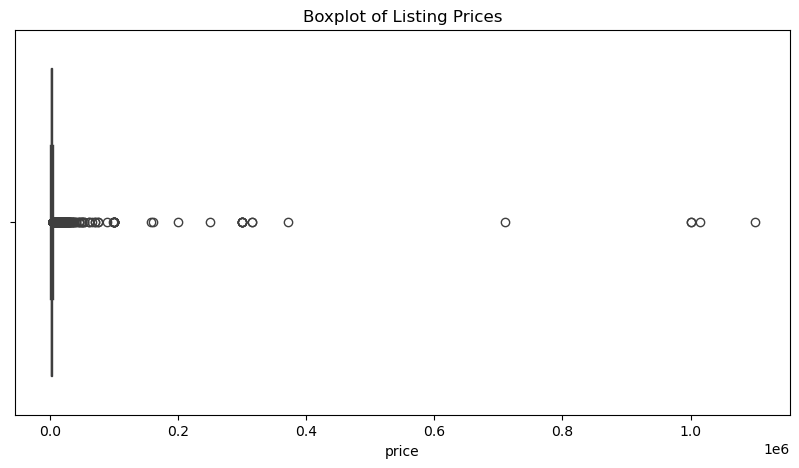

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean_lux['price'])
plt.title("Boxplot of Listing Prices")
plt.show()

In [33]:
# Filter rows where price is within bounds
df_clean= df_firstdata[(df_firstdata['price'] >= lower_bound) & (df_firstdata['price'] <= upper_bound)]
print("######################")
print(f"##Original size: {len(df_clean_lux)}, Cleaned size: {len(df_clean_lux)}")
print(f"##Outliers removed: {len(df_clean_lux) - len(df_clean_lux)}")

######################
##Original size: 15444, Cleaned size: 15444
##Outliers removed: 0


### ** CONCLUSION ** 
after seeing that there are still extreme outlier from the data ive decided to keep the first IQR test `df_clean` and not `df_clean_lux`

In [34]:
df_clean_lux.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_clean,host_name_clean
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.73378,100.56303,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0,Central Bangkok 3 Bedroom Apartment,Henry
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.74668,100.56137,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3,The Duplex - Asoke- Luxury 92sqm,Timo
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.72291,100.53759,Entire home/apt,5429,2,3,2018-12-18,0.03,3,174,0,Urban Oasis in the heart of Bangkok,Apiradee
77,1947314,A room w/ the view :-) in the city,10070953,Vichit,Vadhana,13.71012,100.60281,Entire home/apt,6926,1,1,2019-01-13,0.02,1,364,0,A room w/ the view :-) in the city,Vichit
79,1086843,Near Bangkok more space than urban!,4937984,Sugarcane,Phra Nakhon,13.75135,100.49447,Shared room,5195,1,0,NaT,0.00,1,365,0,Near Bangkok more space than urban!,Sugarcane


### ** below are the Outlier test for number of minimum nights **

In [35]:
Q1 = df_clean_price['minimum_nights'].quantile(0.25)# IQE test for minimum nights
Q3 = df_clean_price['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# boundary
lower_bound_night = Q1 - 1.5 * IQR
upper_bound_night = Q3 + 1.5 * IQR

#outlier copied from previous iqr
outliers_iqr_night = df_clean[
    (df_clean_price['minimum_nights'] < lower_bound_night) |
    (df_clean_price['minimum_nights'] > upper_bound_night)
]

# summary
print("######################")
print(f"## Number of IQR outliers: {len(outliers_iqr_night)}")
print(f"## Lower bound: {lower_bound_night:.2f} nights, Upper bound: {upper_bound_night:.2f} nights")

######################
## Number of IQR outliers: 3008
## Lower bound: -8.00 nights, Upper bound: 16.00 nights


### **ata shows a huge outlier **

I decided to research what are the norms for the minimum nights for a AirBnB
here are the results after searching through forums

- Minimum nights < 28 days considered as short_term stays
- Minimum nights > 28 days considered as long_term stays
- On certain area there are regulation where it limit number of stays (e.g Londond, NewYork etc)
- Stay can be up to 1 year but considered wasteful since AirBnB are meant for shor term stays

Link for sources:
- [https://community.withairbnb.com/t5/Support-with-your-bookings/Short-Term-vs-Long-Term/m-p/1869098][URL
- [https://community.withairbnb.com/t5/Help-with-your-business/Long-term-rental-6-12-months-how-would-you-handle-it/m-p/224839][URL]
- [https://www.quora.com/Can-you-live-in-Airbnb-for-a-year][URL]

I decided to remove the stays that are more than a year 

##################################
### Long-Stay Outlier Analysis ###
Original data count: 14451
Number of >365-night stays removed: 119
New data count: 14332
Maximum nights allowed: 365
##################################
### Removed listings summary:
       minimum_nights
count      119.000000
mean       399.487395
std        144.842689
min        365.000000
25%        365.000000
50%        365.000000
75%        365.000000
max       1125.000000


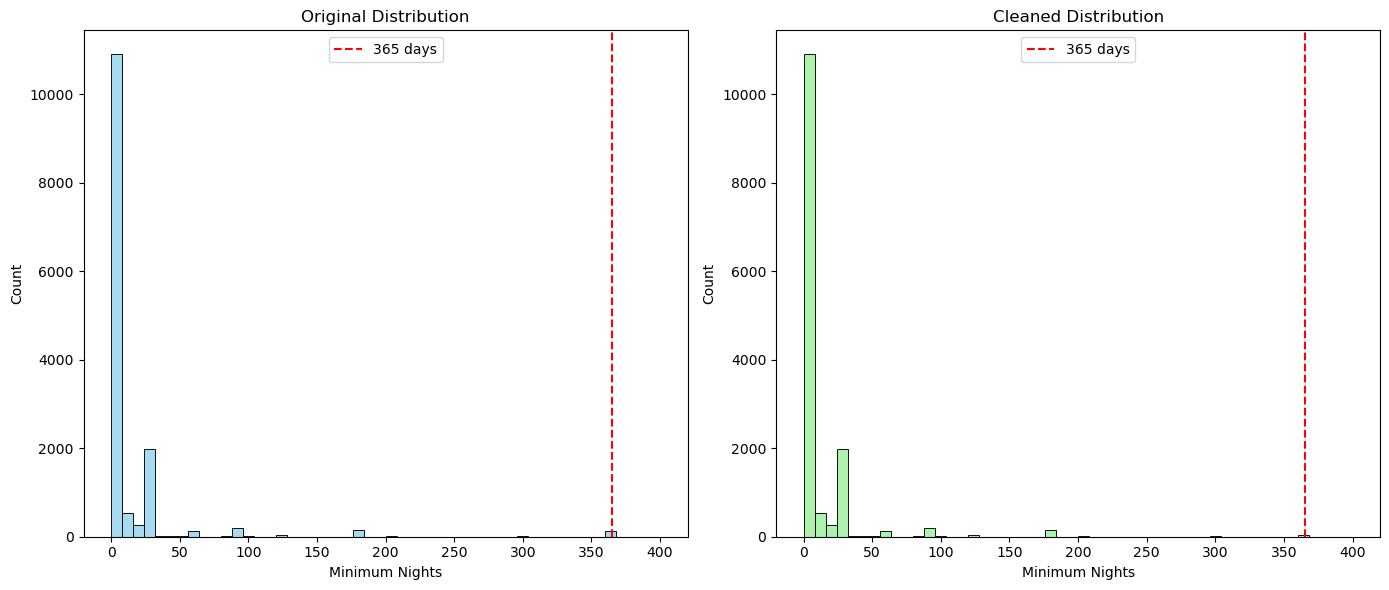

In [36]:
outliers_night = df_clean_price[df_clean_price['minimum_nights'] >= 365]
df_clean_nights = df_clean_price[~df_clean_price.index.isin(outliers_night.index)]

# remove the 
print("##################################")
print("### Long-Stay Outlier Analysis ###")
print(f"Original data count: {len(df_clean_price)}")
print(f"Number of >365-night stays removed: {len(outliers_night)}")
print(f"New data count: {len(df_clean_nights)}")
print(f"Maximum nights allowed: 365")
print("##################################")
print("### Removed listings summary:")
print(outliers_night[['minimum_nights', 'neighbourhood', 'room_type']].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    data=df_clean_price, 
    x='minimum_nights', 
    bins=50, 
    binrange=(0, 400), 
    ax=axes[0], 
    color='skyblue'
)
# seperator
axes[0].axvline(365, color='red', linestyle='--', label='365 days')
axes[0].set_title("Original Distribution")
axes[0].set_xlabel("Minimum Nights")
axes[0].legend()

sns.histplot(
    data=df_clean_nights, 
    x='minimum_nights', 
    bins=50, 
    binrange=(0, 400), 
    ax=axes[1], 
    color='lightgreen'
)
# seperator for the other cleaned version
axes[1].axvline(365, color='red', linestyle='--', label='365 days')
axes[1].set_title("Cleaned Distribution")
axes[1].set_xlabel("Minimum Nights")
axes[1].legend()

plt.tight_layout()
plt.show()


In [37]:
df_clean_nights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   name                            14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

### **DF_CLEAN Final**

## **2.5 Data Cleaned**

In [38]:
#moving the data into a new copy
df_cleaned =df_clean_nights.copy()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   name                            14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

## **Final Check**

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   name                            14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   name                            14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

after making sure the data is cleaned, i moved the data by creating a new datasets 

In [41]:
# final dataframe
df = df_cleaned[[
    'id',
    'name_clean',          #renamed to 'listing_name'
    'host_id',
    'host_name_clean',     #renamed to 'host_name'
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm'
]].rename(columns={
    'name_clean': 'listing_name',
    'host_name_clean': 'host_name'
}).copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   listing_name                    14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

In [42]:
df.head(10)

,id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaT,0.00,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0


###############################################################

Data Cleansing finsiehd

#################################################################

# **3.Feauture Engineering**
Purposes of feautre engineering are :
- **Reveal Hidden Patter**
- **Improve Statistical Test**
- **Create data Clarity**

In [43]:
df.head(10)

,id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaT,0.00,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0


## **3.1 Add another column for `stay_type` from `minimum_nights`**

In [44]:
#add new cloumn
df['stay_type'] = df['minimum_nights'].apply(lambda x: 'short stay' if x <= 28 else 'long stay')

# results
print('#####################')
print(df[['minimum_nights', 'stay_type']].head())

df.head(5)
df.info()

#####################
   minimum_nights   stay_type
0               3  short stay
1               1  short stay
2              60   long stay
3               7  short stay
4               1  short stay
<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   listing_name                    14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price    

## **3.2 Adding New Column for `price_per_night`**

In [45]:
df['price_per_night'] = (df['price'] / df['minimum_nights'].clip(lower=1)).round(2)
# results
print('#####################')
print(df[['minimum_nights', 'stay_type', 'price_per_night']].head())

df.head(5)

#####################
   minimum_nights   stay_type  price_per_night
0               3  short stay           635.00
1               1  short stay          1316.00
2              60   long stay            13.33
3               7  short stay           183.71
4               1  short stay          1905.00


,id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,price_per_night
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,short stay,635.00
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,short stay,1316.00
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,long stay,13.33
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,short stay,183.71
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,short stay,1905.00


#### after reanalysing the data suspicious outlier and decided to perform another IQR and removal of the outlier

### **3.3 Adding new column `listing_category` using quartiles from `price`**

In [46]:
df.head() #checking

,id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,price_per_night
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,short stay,635.00
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,short stay,1316.00
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,long stay,13.33
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,short stay,183.71
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,short stay,1905.00


In [47]:

def func_categorize_prices(df, price_col='price_per_night'):#price cokunb
    q1 = df[price_col].quantile(0.25)#q1
    median = df[price_col].quantile(0.5)#q2
    q3 = df[price_col].quantile(0.75)#q3
    
    # Define categorization function
    def categorize(price):
        if price < q1:
            return 'Budget'
        elif q1 <= price < median:
            return 'Standard'
        elif median <= price < q3:
            return 'Premium'
        else:
            return 'Luxury'
    
    # Aaddd new column
    df['pricing_category'] = df[price_col].apply(categorize)
    
    # results
    print('##########################')
    print(f"##Categorized using:\n- Budget: < {q1:.0f} THB\n- Standard: {q1:.0f}–{median:.0f} THB\n- Premium: {median:.0f}–{q3:.0f} THB\n- Luxury: ≥ {q3:.0f} THB")
    
    return df

# callback
df = func_categorize_prices(df)

##########################
##Categorized using:
- Budget: < 150 THB
- Standard: 150–720 THB
- Premium: 720–1436 THB
- Luxury: ≥ 1436 THB


## **3.4 Adding New Column for `guest_rate_pct`**

In [48]:
df['guest_rate_pct'] = ((1 - (df['availability_365']/365)) * 100).round(0).astype(int)

## **3.5 Adding New Column for `hpst_type`**

In [49]:
df['host_type'] = np.where(
    df['calculated_host_listings_count'] > 1, 
    'Expert', 
    'Casual'
)

In [50]:
print('#####################')
print(df[['minimum_nights', 'stay_type', 'price_per_night', 'host_type', 'guest_rate_pct']].head())

df.head(5)

#####################
   minimum_nights   stay_type  price_per_night host_type  guest_rate_pct
0               3  short stay           635.00    Expert               3
1               1  short stay          1316.00    Expert               2
2              60   long stay            13.33    Casual               0
3               7  short stay           183.71    Casual              12
4               1  short stay          1905.00    Expert               0


,id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,price_per_night,pricing_category,guest_rate_pct,host_type
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,...,2020-01-06,0.50,2,353,0,short stay,635.00,Standard,3,Expert
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,...,NaT,0.00,2,358,0,short stay,1316.00,Premium,2,Expert
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,...,NaT,0.00,1,365,0,long stay,13.33,Budget,0,Casual
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,...,2022-04-01,0.03,1,323,1,short stay,183.71,Standard,12,Casual
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,...,NaT,0.00,3,365,0,short stay,1905.00,Luxury,0,Expert


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   listing_name                    14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

# **4. EDA**

## **4.1 Price Analysis**

### **A. Price Distribution**

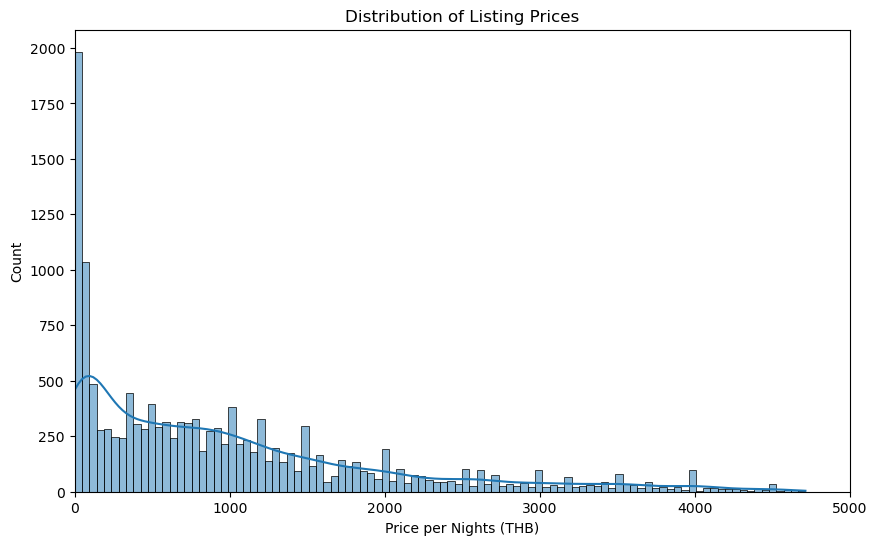

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_night'], bins=100, kde=True)
plt.xlim(0, 5000)  # above outliers 4720.50
plt.title('Distribution of Listing Prices')
plt.xlabel('Price per Nights (THB)')
plt.ylabel('Count')
plt.show()


### **Output Interpretation :**
- Distribution is right-skewed, Indicating that most listing are priced on the lower end
- Pricing are mostly cheap to moderate
- there are a few listing priced as premium

### **B. Price Distribution by `Room_type`**

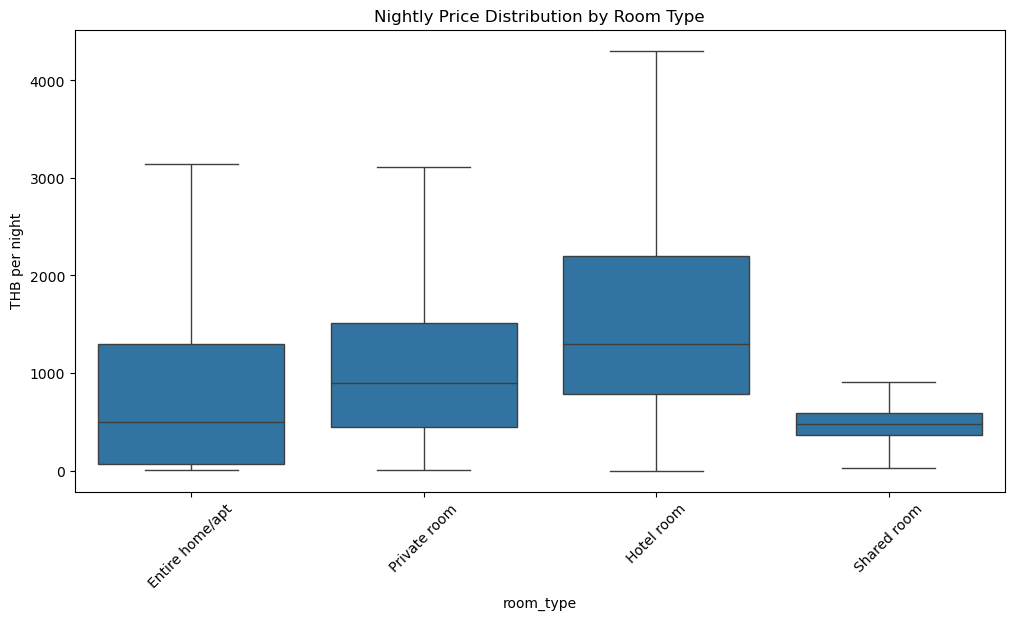

In [53]:
# Distribution of night prices by room type
plt.figure(figsize=(12,6))
sns.boxplot(x='room_type', y='price_per_night', data=df, showfliers=False)
plt.title('Nightly Price Distribution by Room Type')
plt.ylabel('THB per night')
plt.xticks(rotation=45)
plt.show()


### **Bussiness Insights :**
- `Hotel Room` is the most expensive out of the 4, showing a possible competitive yet profitable pricing with a regular hotel
- `Entire home/apt` is the most cheapest option, shows that there are a possibility of host competing with prices, lowering the prices to attract guest.
- `Shared room` is relatively cheap but shows lack pricing range, possibly because of lack listings number or unpopularity among guest.
- `Private room` price as 2nd most expensive, it is possible that it is popular but not as popular as renting `Entire home/apt` since price per nights are moderate showing lack of competition among hosts.

### **C. Price Per Nights Vs Availability**

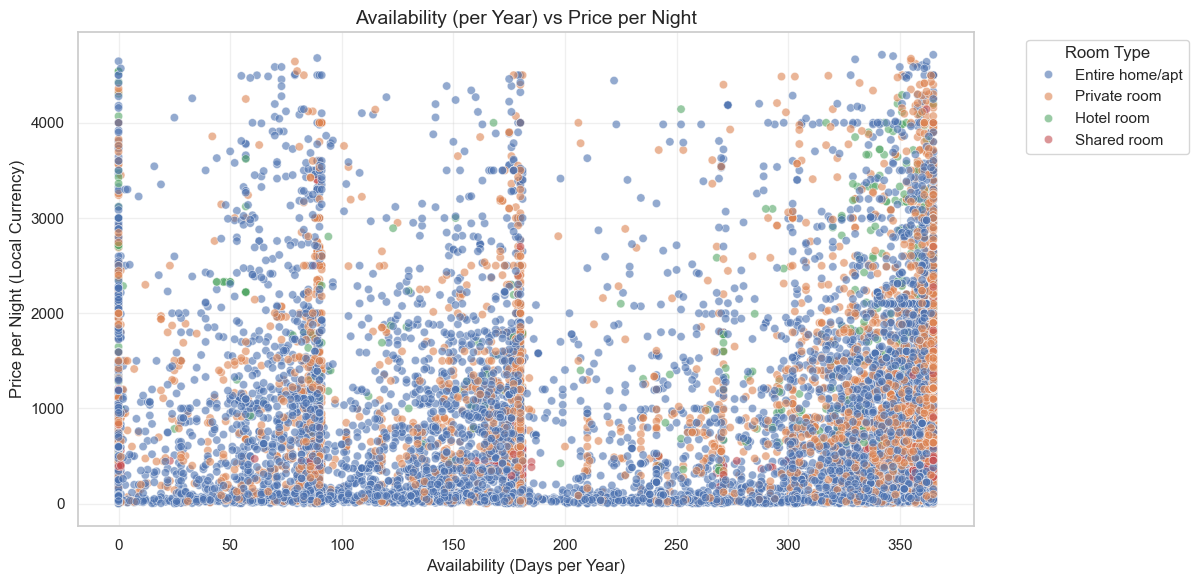

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price_per_night', alpha=0.6, hue='room_type')
plt.title('Availability (per Year) vs Price per Night', fontsize=14)
plt.xlabel('Availability (Days per Year)', fontsize=12)
plt.ylabel('Price per Night (Local Currency)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()          


### **Output Interpretation :**
- Scatter box shows possible seasonal pattern for every 90 days
- Low availability (0 - 90 Days) shows moderate result while High availability (270 - 365 days) listings are high in numbers. Meaning host struggle to attract booking
### **Bussiness Insight :**
- Host can adjust the pricing, when availability is low they can increase the prices if availability is high they can reduce the prices
- there are other key factor that might also come to play such as Location and CTR(Click Through Rate) frin potential Guest.
- Private room are the one with the most availabity, might be pricing issue. since Entire home/apt offers more than a private room.

## **4.2 Room Type Analysis**

### **A. Room Type Distribution**

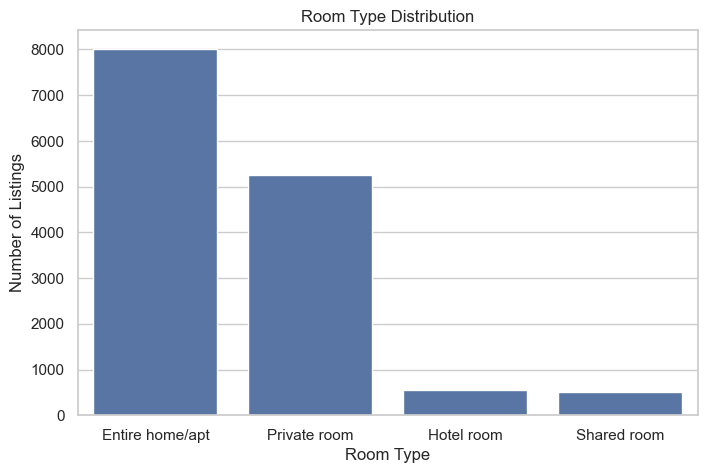

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()


### **Insight :**
- Entire home/apt is the most popular listing by host In Bangkok
- Hotel room and shared room are the lowest listings available in Bangkok, its an assumption but it might have something to do with regulation during Covid Pandemic

### **B. Room Type Reviews Distribution**

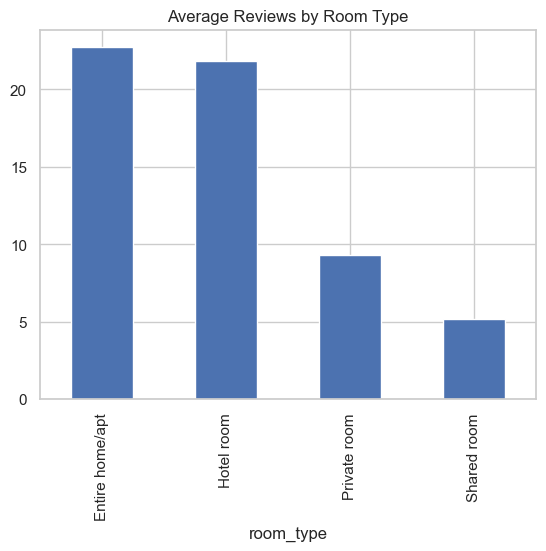

In [56]:
df.groupby('room_type')['number_of_reviews'].mean().plot(kind='bar')
plt.title("Average Reviews by Room Type");

### **Insight :**
- Entire home/apt has the most reviews showing its popularity among guest
- Although Hotel room has viewer listings it seem to be more popular than private room as an AirBnB, this might have something to do with service and accomodation provided by each room type.
- Shared room having fewest review show guest lacks of interest of sharing spaces which might be the reason that the price variation and listings amount are the fewest among the room type.

## **4.3 Host_type Analysis**

### **A. Host_type performance comparison**

Host Type Performance Comparison:


,Median Price,Avg Occupancy,Listings Count
host_type,,,
Casual,549.250000,35.593645,4186
Expert,783.500000,32.693475,10146


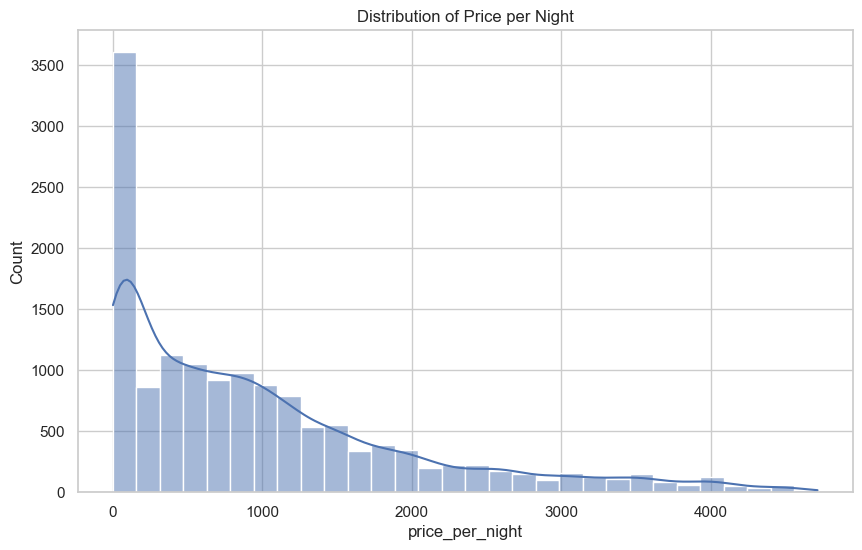

In [57]:
# Host type compare
host_comparison = df.groupby('host_type').agg({
    'price_per_night': 'median',
    'guest_rate_pct': 'mean',
    'calculated_host_listings_count': 'count'
}).rename(columns={
    'price_per_night': 'Median Price',
    'guest_rate_pct': 'Avg Occupancy',
    'calculated_host_listings_count': 'Listings Count'
})

print("Host Type Performance Comparison:")
display(host_comparison.style.background_gradient(cmap='Blues'))

# listings
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_night'], kde=True, bins=30)
plt.title("Distribution of Price per Night")
plt.show()

### **Key Insight:**
- Expert hosts charge significantly higher prices and have more listings, indicating they likely operate at a business scale.
- However, casual hosts have higher average occupancy, suggesting guests may prefer casual hosts for value or authenticity.
- Majority of host are likely to own just one listing and operate on small scale operation

# **5. Statistical Test**


### **A. Mann-Whitney U Test**



In [58]:
#######library##########
from scipy.stats import mannwhitneyu

casual_prices = df[df['host_type'] == 'Casual']['price_per_night']
expert_prices = df[df['host_type'] == 'Expert']['price_per_night']

stat, p = mannwhitneyu(casual_prices, expert_prices, alternative='two-sided')
print('#####################################')
print(f"### Mann-Whitney U Test: p-value = {p:.4f}")

#####################################
### Mann-Whitney U Test: p-value = 0.0000


#### **Conclusion :**
- reject null hypothesis
- Experts vs Casual Host price distribtuion are not the same
- Experts Host Charge more than Casual host

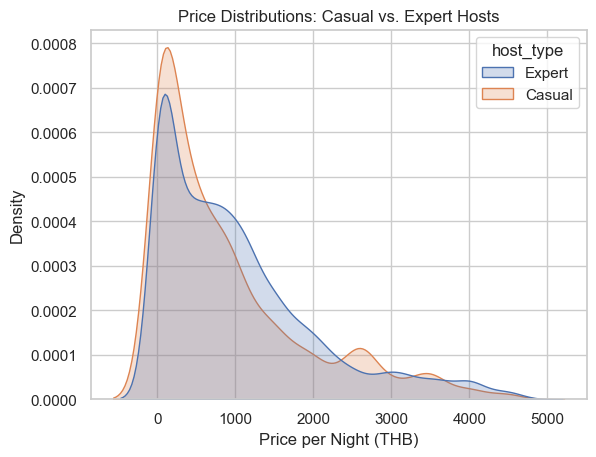

In [59]:
sns.kdeplot(data=df, x='price_per_night', hue='host_type', fill=True, common_norm=False)
plt.title("Price Distributions: Casual vs. Expert Hosts")
plt.xlabel("Price per Night (THB)")
plt.show()

In [60]:
n1, n2 = len(casual_prices), len(expert_prices)
r = 1 - (2 * stat) / (n1 * n2)  # stat = U from Man whitney
print(f"Effect Size (Rank-Biserial r): {r:.3f}")

Effect Size (Rank-Biserial r): 0.107


- Effect size 0.107 means, that Expert does charge more but modest

### **B. Colleration between pricing and listings count ;**

In [61]:
############Library##############
from scipy.stats import spearmanr

corr, p = spearmanr(df['calculated_host_listings_count'], df['price_per_night'])
print('##################')
print(f"## Spearman’s Correlation: p (rho) = {corr:.3f}, p-value = {p:.4f}")

##################
## Spearman’s Correlation: p (rho) = 0.124, p-value = 0.0000


#### **Conclusion**
- the rho shows 0.124 which are weak, meaning that there are small but significant colleration.
- the p value = 0, shows that colleration statistaclly significant

### **C. ANOVA Statistical analysis**

In [62]:
############Library#############
from scipy.stats import f_oneway

#  data
entire = df[df['room_type'] == 'Entire home/apt']['price_per_night']
private = df[df['room_type'] == 'Private room']['price_per_night']
shared = df[df['room_type'] == 'Shared room']['price_per_night']
hotel = df[df['room_type'] == 'Hotel room']['price_per_night']

f_stat, p_value = f_oneway(entire, private, shared, hotel)

print(f"ANOVA Results: F = {f_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences exist between room types")
    # Post-hoc Tukey test
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df['price_per_night'], df['room_type'])
    print(tukey.summary())
else:
    print("No significant differences")

ANOVA Results: F = 159.85, p = 0.0000
Significant differences exist between room types
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1        group2     meandiff p-adj   lower      upper   reject
------------------------------------------------------------------------
Entire home/apt   Hotel room  703.4499   0.0   591.8911  815.0087   True
Entire home/apt Private room  246.7867   0.0   201.7079  291.8656   True
Entire home/apt  Shared room -282.9973   0.0  -399.4003 -166.5942   True
     Hotel room Private room -456.6631   0.0  -570.1055 -343.2208   True
     Hotel room  Shared room -986.4472   0.0 -1142.6097 -830.2846   True
   Private room  Shared room  -529.784   0.0  -647.9935 -411.5745   True
------------------------------------------------------------------------


#### **Conclusion :**
- There are significant differences
- Hotel Being the most the most expensive listings
- Entire home/apt being moderate 
- Private room being budget friendly
- Shared room remain the cheapest

### **D. Chi-Square**

In [63]:
############################
from scipy.stats import chi2_contingency

# table
contingency_table = pd.crosstab(df['neighbourhood'], df['pricing_category'])

#Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#results
print('###########################')
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

###########################
Chi-Square Statistic: 1425.8601118613421
Degrees of Freedom: 147
P-Value: 3.571887679922758e-208


#### **Conclusion :**
- There are significant relationship between neighbourhood and pricing_category

# **6. Transfer Data**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15853
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14332 non-null  int64         
 1   listing_name                    14332 non-null  object        
 2   host_id                         14332 non-null  int64         
 3   host_name                       14332 non-null  object        
 4   neighbourhood                   14332 non-null  object        
 5   latitude                        14332 non-null  float64       
 6   longitude                       14332 non-null  float64       
 7   room_type                       14332 non-null  object        
 8   price                           14332 non-null  int64         
 9   minimum_nights                  14332 non-null  int64         
 10  number_of_reviews               14332 non-null  int64         
 11  last_re

In [65]:
# Replace 'your_filename.csv' with your desired name
df.to_csv(r'C:\Users\andia\Downloads\airbnb_bangkok_processed.csv', index=False)

- tranfer succesful

Additional for testing covid

In [67]:
from scipy.stats import ttest_ind

df_covid_period = df[
    (df['last_review'].dt.year >= 2020) & (df['last_review'].dt.year <= 2021)
]
df_post_covid_period = df[
    (df['last_review'].dt.year >= 2022)
]
# Select relevant column (drop NA)
covid_price_list = df_covid_period['price_per_night'].dropna()
postcovid_price_list = df_post_covid_period['price_per_night'].dropna()

t_stat_covid_price, p_val_covid_price = ttest_ind(
    covid_price_list, postcovid_price_list, equal_var=False
)

print("Welch’s t-test for COVID vs Post-COVID Price:")
print(f"T-statistic: {t_stat_covid_price:.4f}")
print(f"P-value: {p_val_covid_price:.4f}")


Welch’s t-test for COVID vs Post-COVID Price:
T-statistic: -1.9649
P-value: 0.0496
